# Example 03-05

Mohan-Meakins Breveries Ltd. has two bottling plants, one located
at Solan and the other at Mohan Nagar

$$ \min Z = 600x_1 + 400x_2 $$

\begin{align*}
1500x_1 + 1500x_2 &\geq 20000 \\
3000x_1 + 1000x_2 &\geq 40000 \\
2000x_1 + 5000x_2 &\geq 44000 \\[3mm]
x_1, x_2 &\geq 0
\end{align*}






In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# domain function
x = np.linspace(0, 50, 100)

In [3]:
# constraints
eq1 = (200 - 15*x) / 15
eq2 = ( 40 -  3*x)
eq3 = ( 44 -  2*x) / 5

In [4]:
# objective function (z equation)
zeq = lambda x1, z: (z - 600*x) / 400

# equations list
equations_list = [(x, eq1),
                  (x, eq2),
                  (x, eq3),
                  ]

# equations label
equations_label = [r"$1500x_1 + 1500x_2 \geq 20000$",
                   r"$3000x_1 + 1000x_2 \geq 40000$",
                   r"$2000x_1 + 5000x_2 \geq 44000$",
                   ]

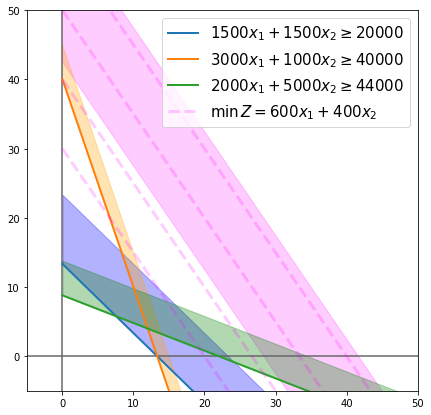

In [5]:
# ===================== First Plot =====================
plt.figure(figsize=(7,7))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# plot equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)
# plot z equation
plt.plot(x, zeq(x, 24000), lw=3, ls="--", color="magenta", alpha=0.2, label=r"$\min\, Z = 600x_1 + 400x_2$")
for i in np.linspace(20000, 12000, 3):
    plt.plot(x, zeq(x, i), lw=3, ls="--", color="magenta", alpha=0.2)
# inequalities area
plt.fill_between(x,zeq(x, 25000), zeq(x, 25000) - 20, color="magenta", alpha=0.2)
plt.fill_between(x,eq1, eq1+10, color="blue", alpha=0.3)
plt.fill_between(x,eq2, eq2+5, color="orange", alpha=0.3)
plt.fill_between(x,eq3, eq3+5, color="green", alpha=0.3)
# plt.fill_between(x, np.maximum.reduce([eq2,eq3 ,np.zeros_like(x)]), zeq(x, 50000), facecolor="0.6")
# configuration parameters
plt.xlim(-5, 50)
plt.ylim(-5, 50)
plt.legend(fontsize=15, loc="upper right")
plt.show()

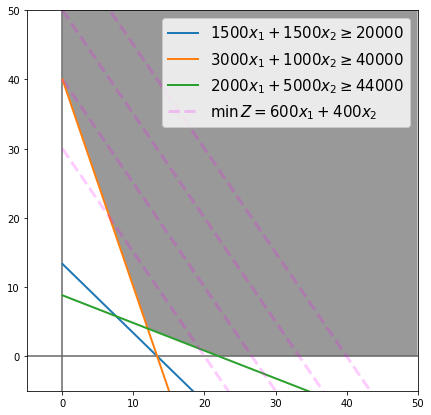

In [6]:
# ===================== First Plot =====================
plt.figure(figsize=(7,7))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# plot equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)
# plot z equation
plt.plot(x, zeq(x, 24000), lw=3, ls="--", color="magenta", alpha=0.2, label=r"$\min\, Z = 600x_1 + 400x_2$")
for i in np.linspace(20000, 12000, 3):
    plt.plot(x, zeq(x, i), lw=3, ls="--", color="magenta", alpha=0.2)
# common area
plt.fill_between(x, np.maximum.reduce([eq2,eq3 ,np.zeros_like(x)]), zeq(x, 50000), facecolor="0.6")
# configuration parameters
plt.xlim(-5, 50)
plt.ylim(-5, 50)
plt.legend(fontsize=15, loc="upper right")
plt.show()

In [7]:
# Coefficient Matrix 
A = np.array([
    [15, 15],  # blue   0  eq1
    [ 3,  1],  # orange 1  eq2
    [ 2,  5],  # green  2  eq3
    [ 0,  1],  # xAxis  3
    [ 1,  0],  # yAxis  4
    ])
# right-hand side vector
b = np.array([200, 
               40, 
               44,
                0,  # xAxis
                0,  # yAxis
               ])

In [8]:
# intersecting lines
intersecting_lines = [(1, 4),  # eq2 vs yAxis
                      (1, 2),  # eq2 vs eq3
                      (2, 3),  # eq3 vs xAxis
                      ]  
# solve equations system
points = [np.linalg.solve(A[[*i]], b[[*i]]) for i in intersecting_lines]

# getting best z value
best_index, best_value = min(enumerate(np.array([600, 400]).dot(point) for point in points), key=lambda t:t[1])
best_point = points[best_index]

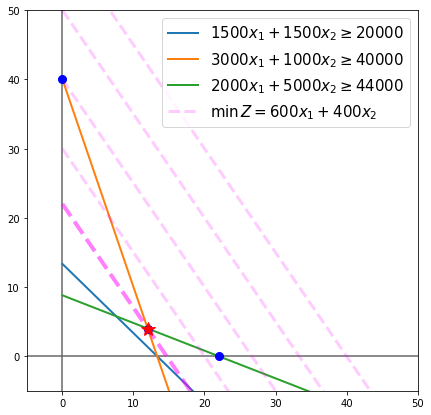

In [9]:
# ===================== Second Plot =====================
plt.figure(figsize=(7,7))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# plot equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)
# plot z equation
plt.plot(x, zeq(x, 24000), lw=3, ls="--", color="magenta", alpha=0.2, label=r"$\min\, Z = 600x_1 + 400x_2$")
for i in np.linspace(20000, 12000, 3):
    plt.plot(x, zeq(x, i), lw=3, ls="--", color="magenta", alpha=0.2)
plt.plot(x, zeq(x, best_value), lw=4, ls="--", color="magenta", alpha=0.5)
# plottin points
for point in points:
    plt.plot(*point, color="b", marker="o", ms=8)
plt.plot(*best_point, color="red", marker="*", ms=15)
# configuration parameters
plt.xlim(-5, 50)
plt.ylim(-5, 50)
plt.legend(fontsize=15, loc="upper right")
plt.show()